In [24]:
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
from bootstrap_utils import get_df, get_formatted_df, bootstrap
from matplotlib.pyplot import figure
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [1]:
path = 'tom_project_metrics_Final.csv'

In [3]:
df = get_df(path)

In [4]:
df.head(5)

,id,repo_fullname,commits_count,commits_days_since_first,commits_days_since_last,commits_total_lines_added,commits_total_lines_removed,commits_avg_added,commits_avg_removed,commits_avg_files_changed,commits_avg_message_length,commits_avg_per_day,commits_avg_per_day_real,commits_max_per_day,contributors_count,contributors_top_avg_commits,contributors_top_avg_participation_week,contributors_top_avg_additions,contributors_top_avg_deletions,forks_count,forks_avg_per_day,forks_avg_max_per_day,issues_total_comments,issues_count,issues_open,issues_labels,issues_avg_labels,issues_avg_closing_time,issues_avg_comment_time,issues_avg_comments,issues_avg_comment_length,issues_avg_title_length,issues_avg_body_length,issues_avg_per_day,issues_avg_per_day_real,issues_max_per_day,repo_size,repo_topics,repo_branches,repo_age_days,repo_workflows,repo_languages,repo_milestones,repo_watchers,repo_deployments,repo_readme_length,repo_network_members,pulls_count,pulls_total_lines_added,pulls_total_lines_removed,pulls_avg_lines_added,pulls_avg_lines_removed,pulls_avg_closing_time,pulls_avg_comments,pulls_avg_review_comments,pulls_avg_Commits,pulls_avg_body_length,pulls_avg_title_length,pulls_avg_files_changed,pulls_avg_labels,pulls_avg_created_per_day,pulls_avg_created_per_day_real,pulls_max_created_per_day,releases_count,releases_tags,releases_total_downloads,releases_avg_body_length,releases_avg_title_length,releases_avg_assets,releases_avg_assets_downloads,releases_avg_assets_size,releases_avg_downloads_per_day,stars_count,stars_avg_per_day_real,stars_max_per_day,wf_count,wf_avg_duration,wf_avg_success_duration,wf_avg_failure_duration,wf_avg_successes_per_day,wf_avg_successes_per_day_real,wf_avg_fails_per_day,created_at,updated_at
0,65,EOSCogniton/STUF-2020,3848.0,1083.0,93.0,33039870.0,6329848.0,8586.0,1645.0,22.0,32.0,NaN,11.0,123.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3562105,0,1,1083,0,4,0,1,0,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,1,1,0,0.000000,0.000000,0.00000,0,0,0,2022-03-01 07:03:55.319325,2022-03-01 07:03:55.319325
1,222,Haverim-Larefua/haverim-lerefua-server,215.0,815.0,38.0,51825.0,12354.0,241.0,57.0,3.0,58.0,NaN,2.0,8.0,0,0,0,0,0,0,0,0,5,35,5,12,0,0,0,0,86,38,1898,0,1,2,29369,0,27,815,0,3,0,0,0,4045,0,5,64,1219,12,243,0,0,0,1,5144,36,1,1,0,1,1,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0.000000,0.000000,0.00000,0,0,0,2022-03-03 09:19:29.272767,2022-03-03 09:19:29.272767
2,357,google/cadvisor,3327.0,2826.0,19.0,3591367.0,2840083.0,1079.0,854.0,8.0,94.0,NaN,3.0,38.0,100,16,6,930,989,1899,0,7,15011,3059,530,1348,0,0,0,4,356,43,742,1,2,24,51956,0,34,2826,2,7,2,13134,0,4814,1968,21,5194,1907,247,90,0,5,1,4,242,43,6,1,0,1,2,93,93,22952110,465,6,0,273239,26603073,NaN,13134,4,98,32,0.284839,0.141449,0.14339,0,3,0,2022-03-05 15:42:56.336151,2022-03-05 15:42:56.336151
3,358,eugenp/tutorials,27416.0,3232.0,1.0,45582991.0,41369145.0,1663.0,1509.0,18.0,89.0,NaN,10.0,88.0,100,101,29,508,463,46931,14,61,2555,11892,64,278,0,0,0,0,189,38,93,3,5,38,328330,0,9,3232,0,36,0,29694,0,4324,47411,33,15389,257,466,7,0,0,1,5,32,39,9,0,0,1,5,0,0,0,0,0,0,0,0,NaN,29693,11,104,0,0.000000,0.000000,0.00000,0,0,0,2022-03-06 04:46:23.024735,2022-03-06 04:46:23.024735
4,359,predixdesignsystem/px-iconography-design,61.0,2354.0,1105.0,15199.0,1173.0,249.0,19.0,3.0,33.0,NaN,1.0,4.0,9,4,3,384,26,3,0,1,1,1,0,0,0,0,0,1,32,25,966,0,1,1,1782,1,4,2354,0,4,0,0,20,783,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,31,14,0,0,0,NaN,0,0,0,0,0.000000,0.000000,0.00000,0,0,0,2022-03-06 04:47:04.016663,2022-03-06 04:47:04.016663


In [5]:
df.isna().sum()

id                                           0
repo_fullname                                0
commits_count                               22
commits_days_since_first                    22
commits_days_since_last                     22
commits_total_lines_added                   22
commits_total_lines_removed                 22
commits_avg_added                           22
commits_avg_removed                         22
commits_avg_files_changed                   22
commits_avg_message_length                  22
commits_avg_per_day                        703
commits_avg_per_day_real                    22
commits_max_per_day                         22
contributors_count                           0
contributors_top_avg_commits                 0
contributors_top_avg_participation_week      0
contributors_top_avg_additions               0
contributors_top_avg_deletions               0
forks_count                                  0
forks_avg_per_day                            0
forks_avg_max

In [6]:
df = get_formatted_df(df)

In [7]:
df.isna().sum()

commits_count                              0
commits_days_since_first                   0
commits_days_since_last                    0
commits_total_lines_added                  0
commits_total_lines_removed                0
commits_avg_added                          0
commits_avg_removed                        0
commits_avg_files_changed                  0
commits_avg_message_length                 0
commits_avg_per_day_real                   0
commits_max_per_day                        0
contributors_count                         0
contributors_top_avg_commits               0
contributors_top_avg_participation_week    0
contributors_top_avg_additions             0
contributors_top_avg_deletions             0
forks_count                                0
forks_avg_per_day                          0
forks_avg_max_per_day                      0
issues_total_comments                      0
issues_count                               0
issues_open                                0
issues_lab

In [11]:
ranges = list(range(50, len(df), 50))
ranges[-1] = len(df)

df_means = [bootstrap(df.head(i)) for i in ranges]

In [13]:
df_means[-1].to_csv("bootstrap.csv")

In [14]:
intervals = {key:[] for key in df.keys()}
for i in range(len(df_means)):
    for key in df.keys():
        intervals[key].append([df_means[i][key].iloc[0], df_means[i][key].iloc[1], np.mean([df_means[i][key].iloc[0], df_means[i][key].iloc[1]])])
    

<ipython-input-15-d38e86978070>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1, 2, figsize=(12,3))


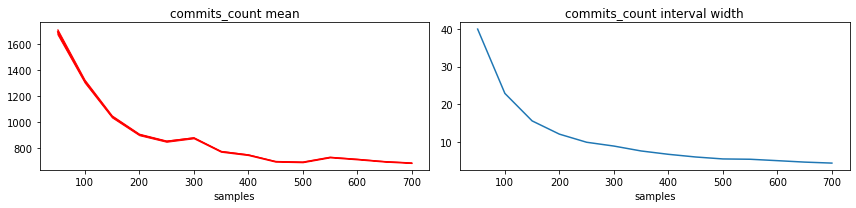

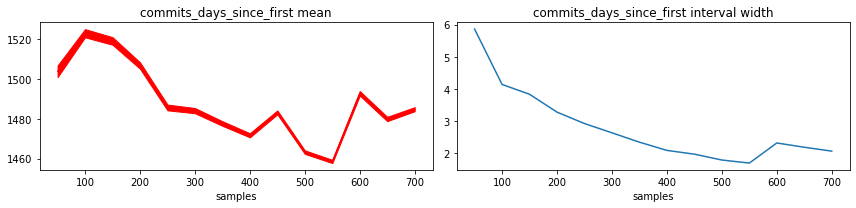

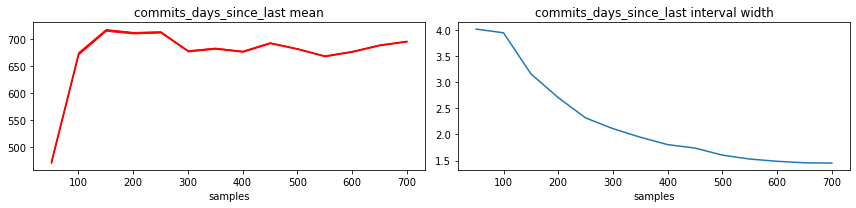

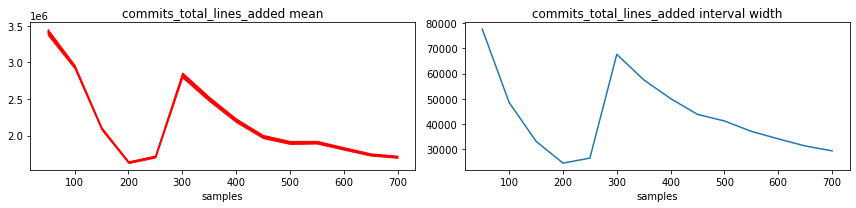

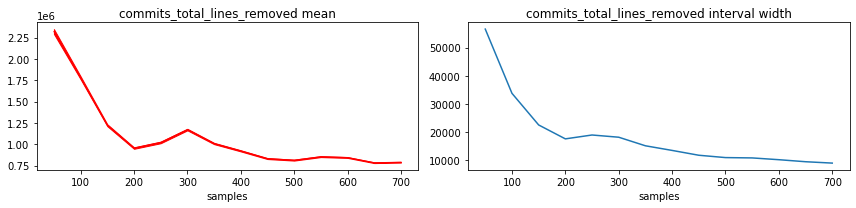

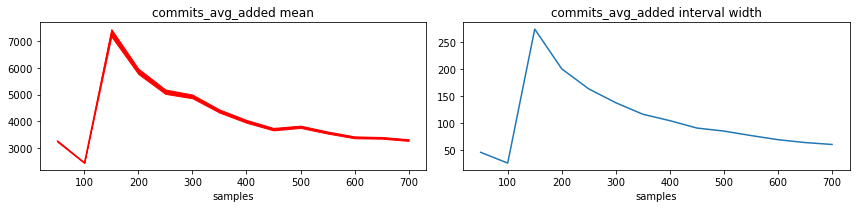

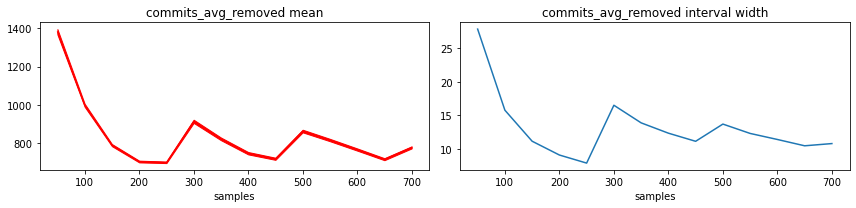

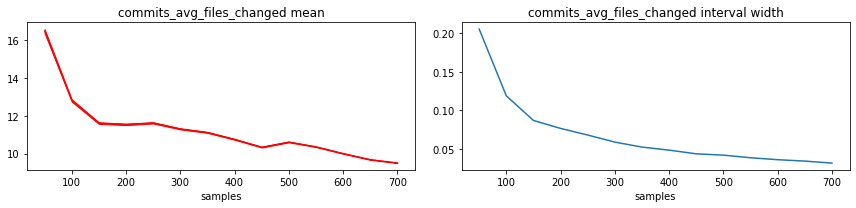

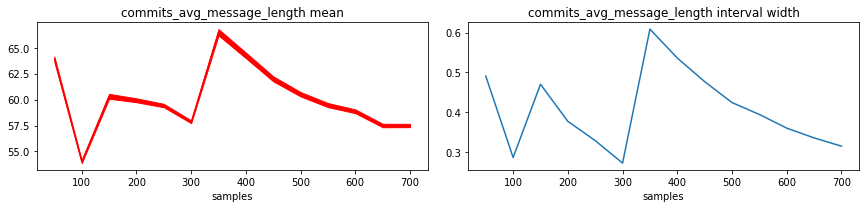

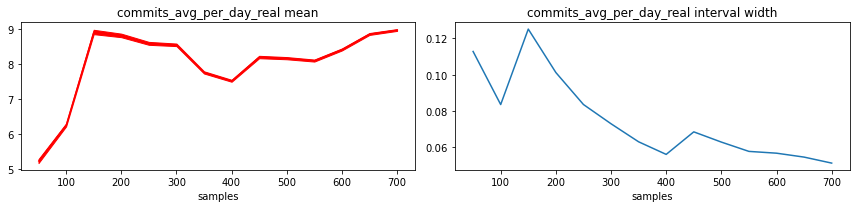

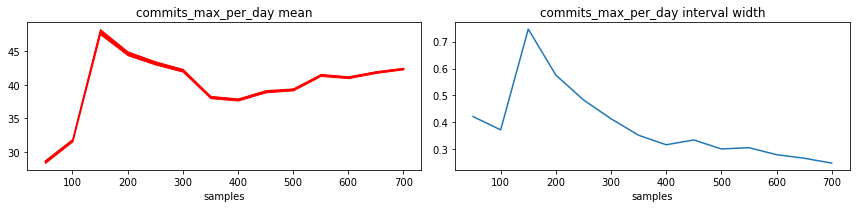

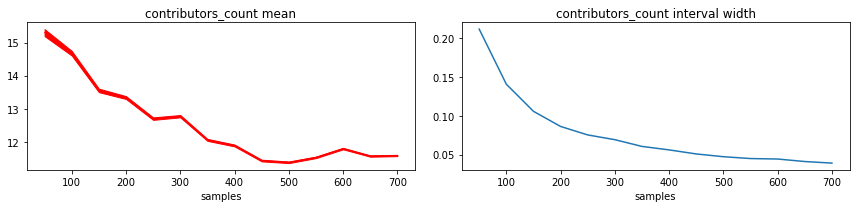

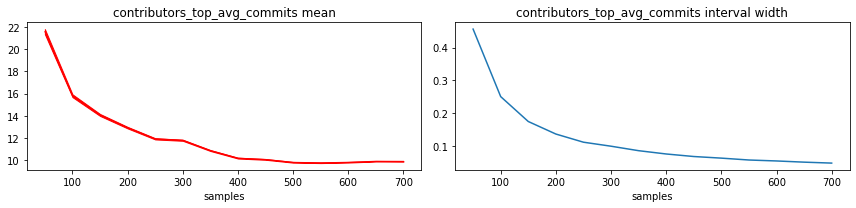

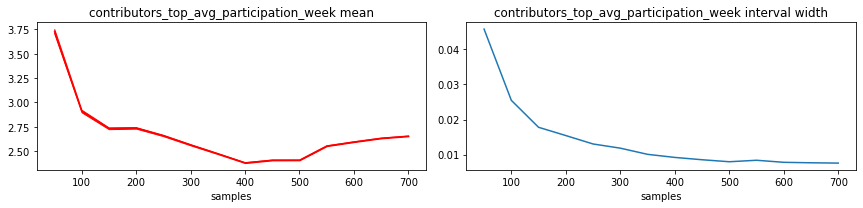

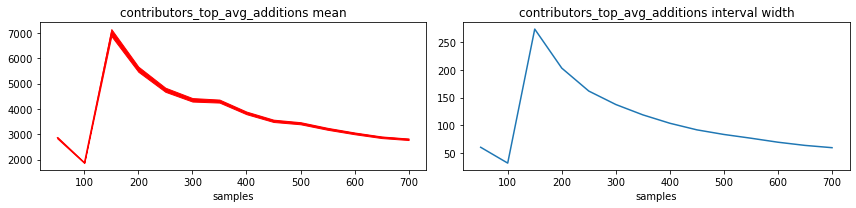

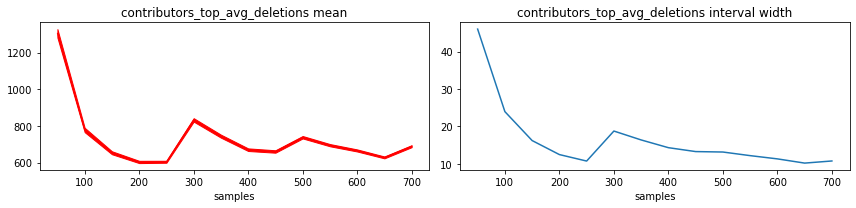

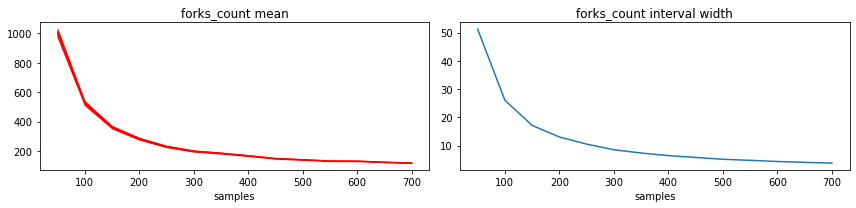

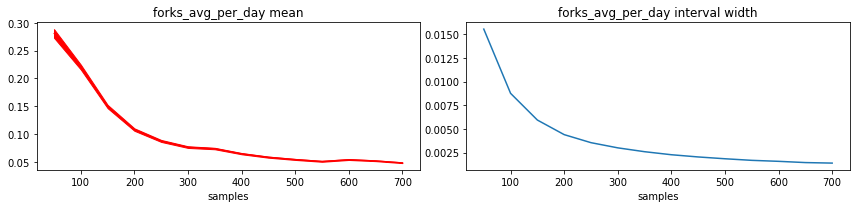

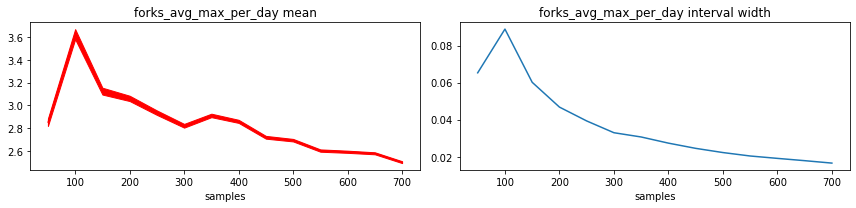

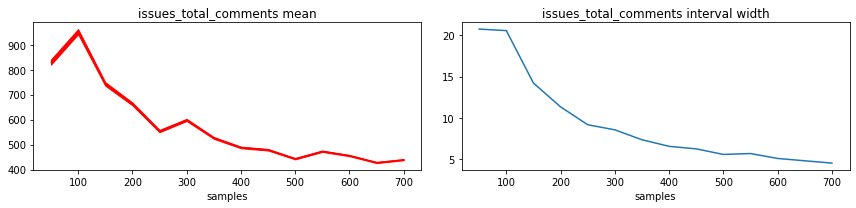

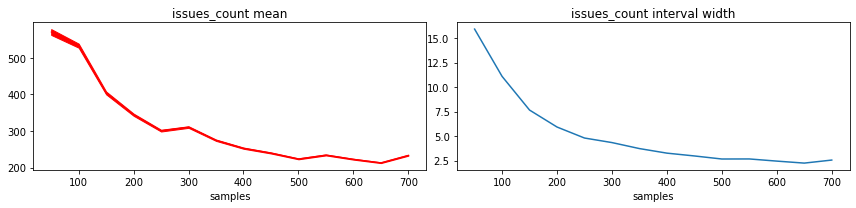

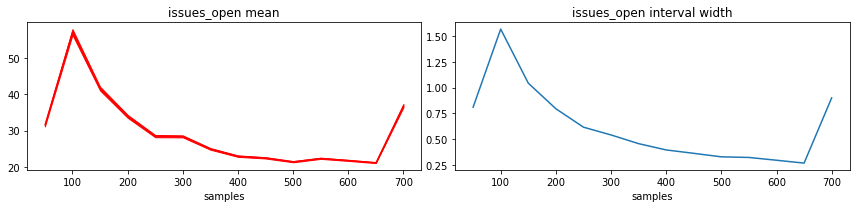

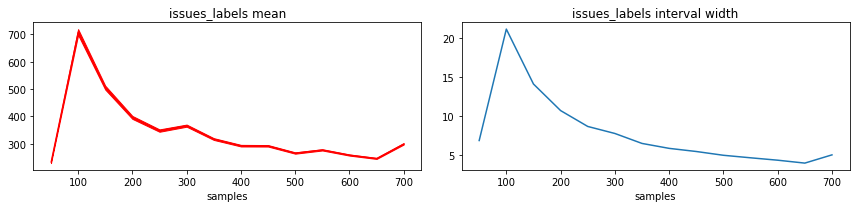

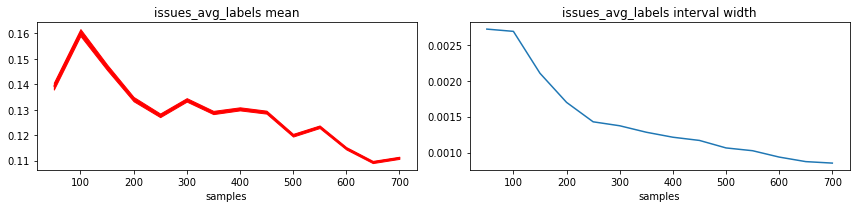

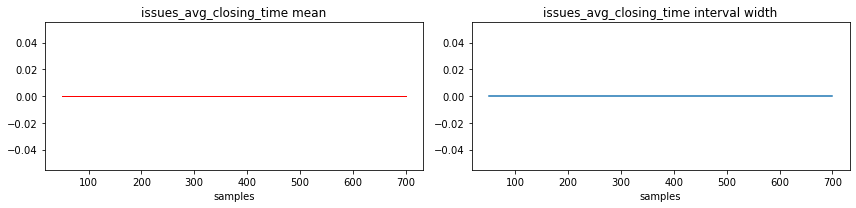

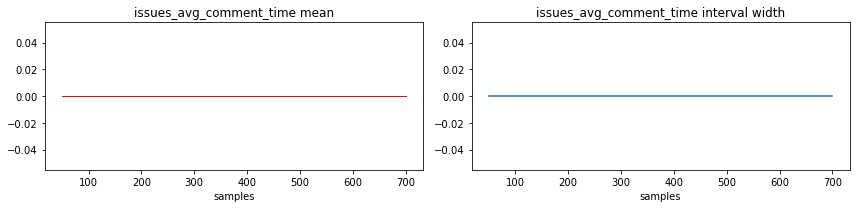

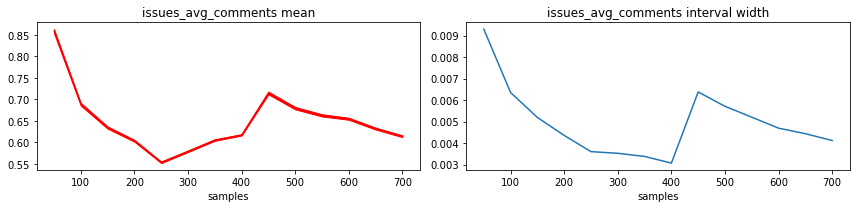

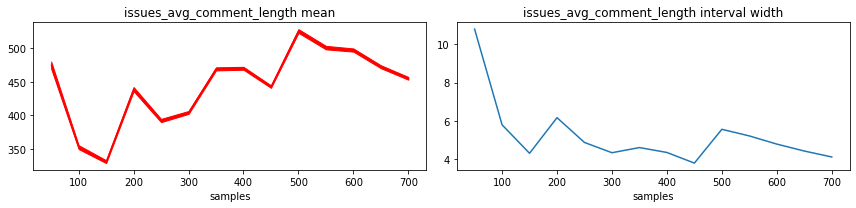

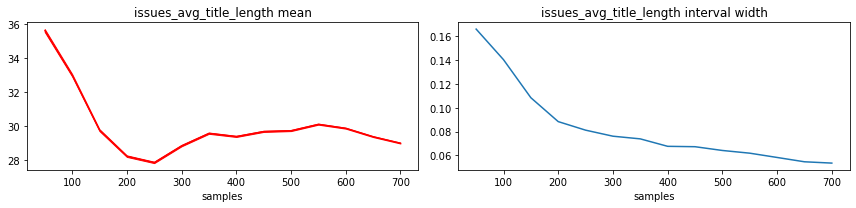

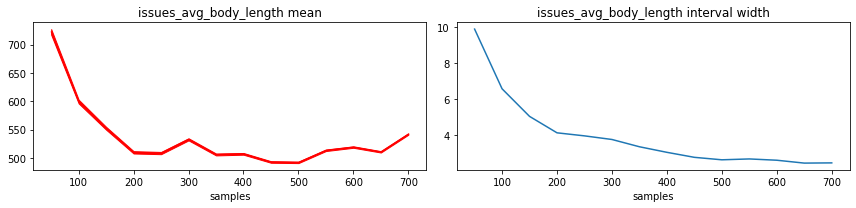

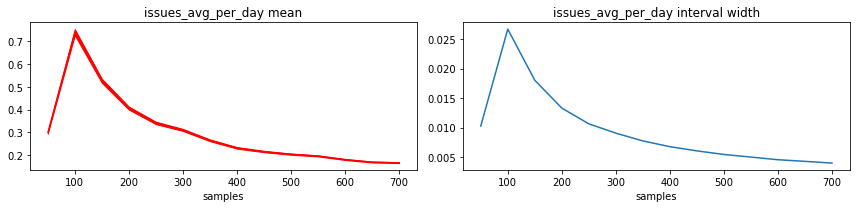

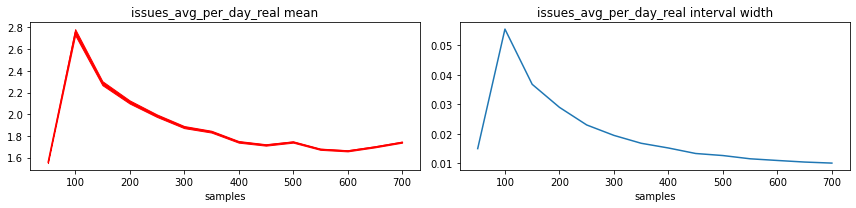

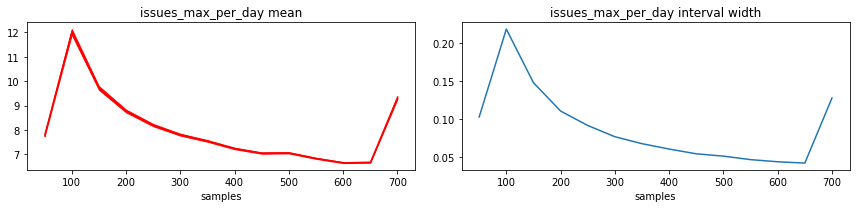

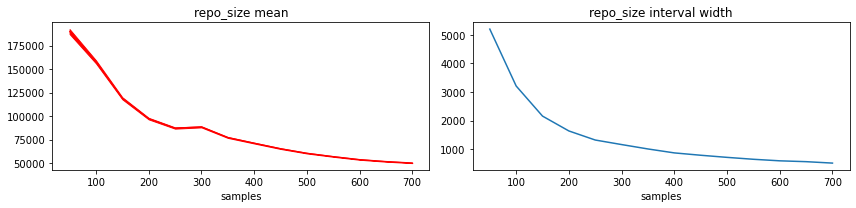

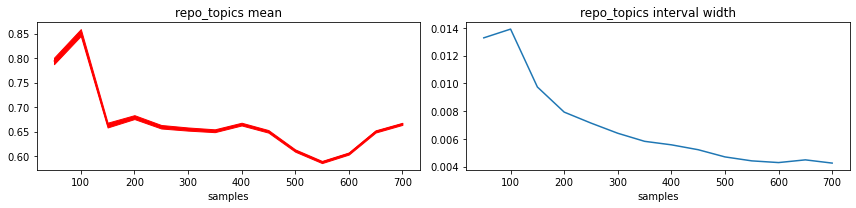

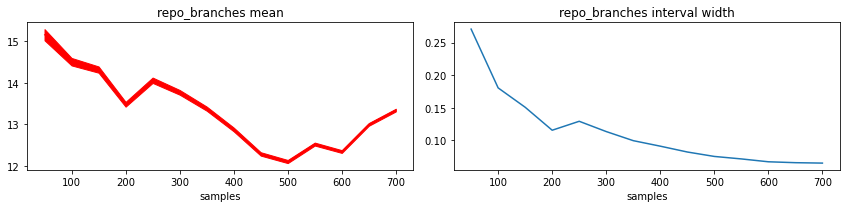

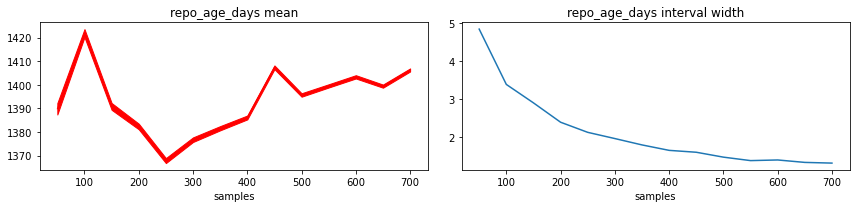

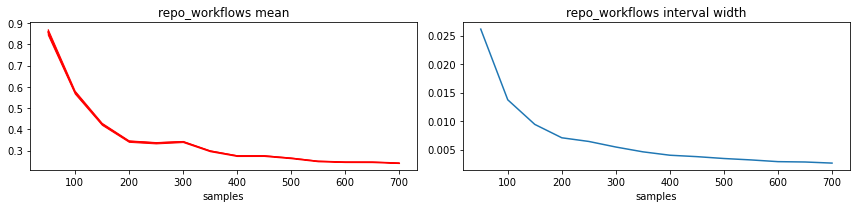

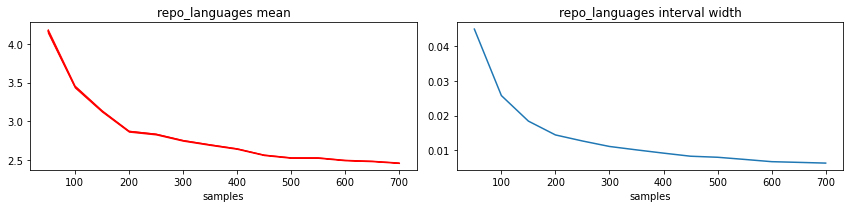

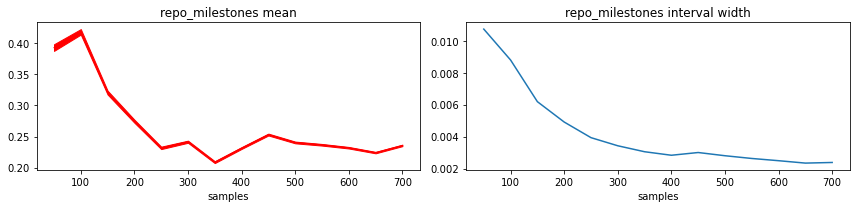

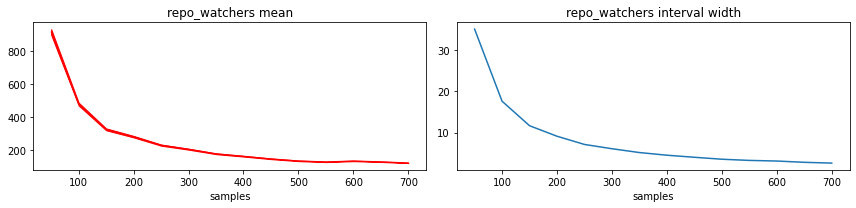

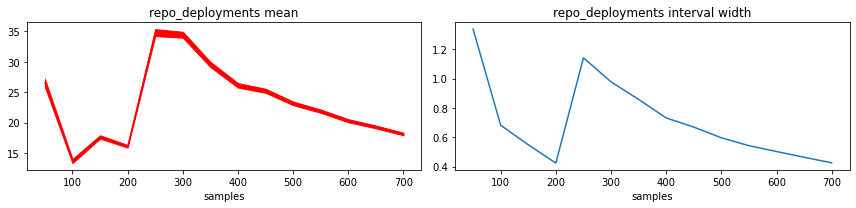

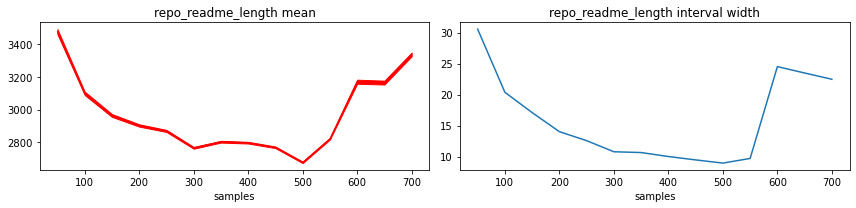

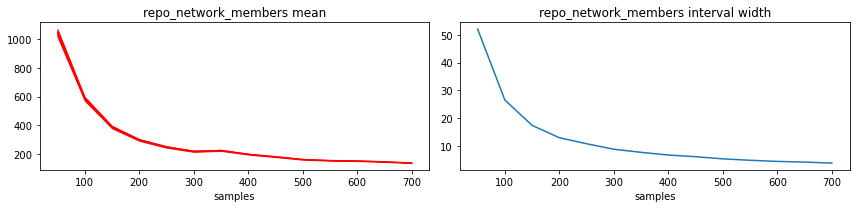

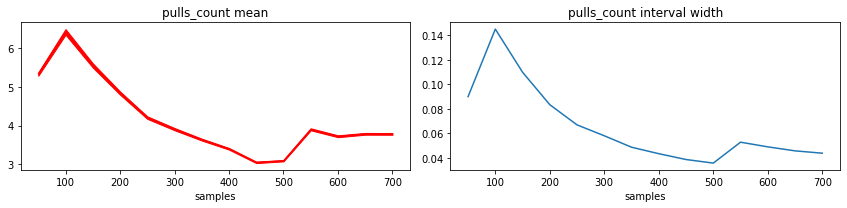

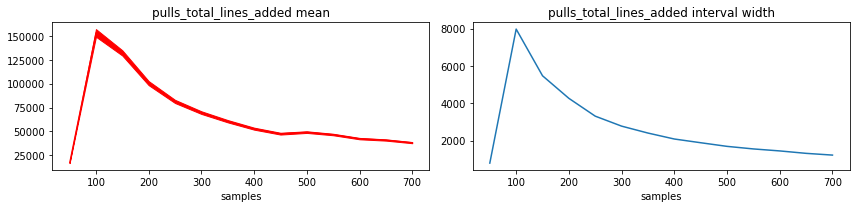

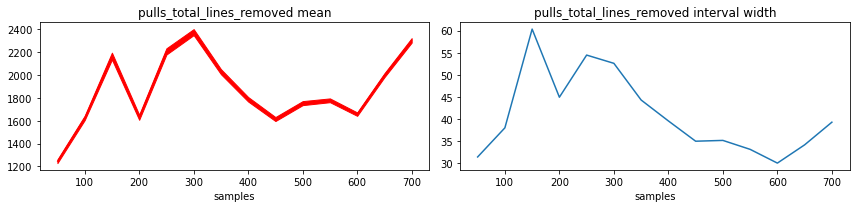

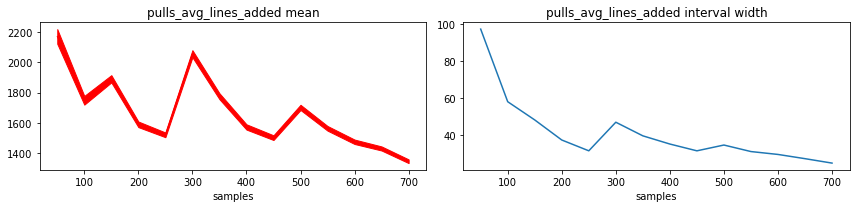

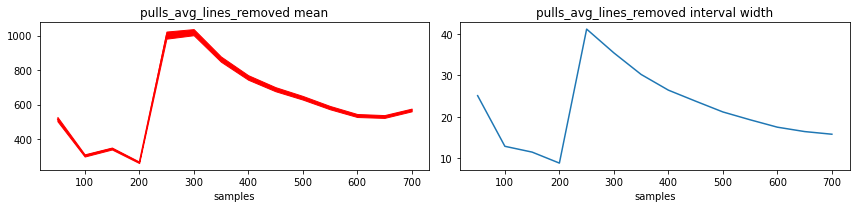

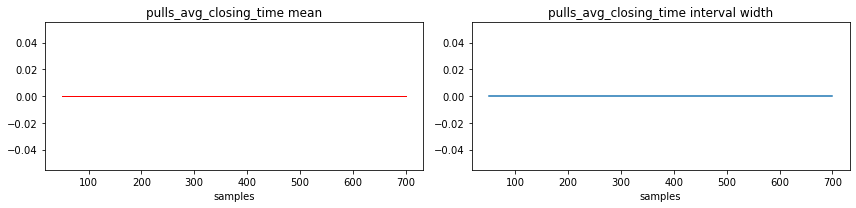

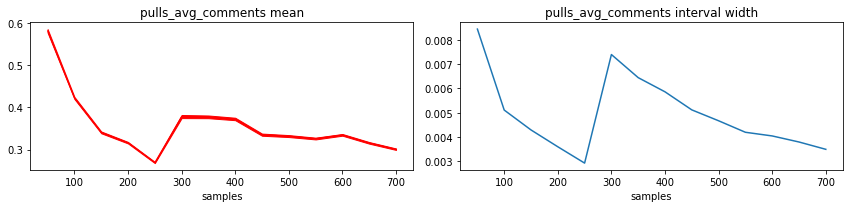

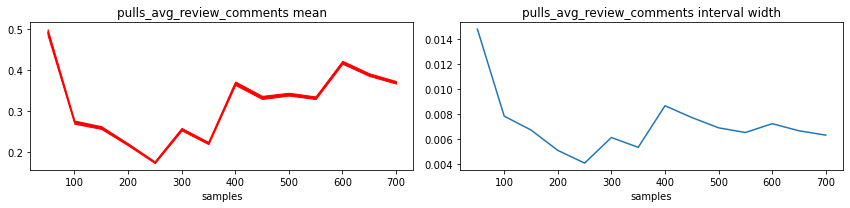

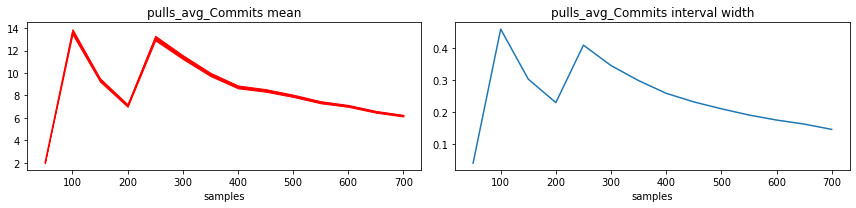

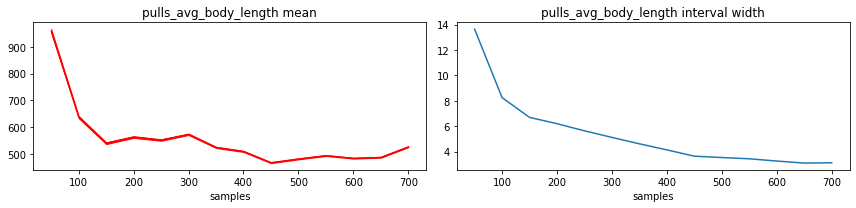

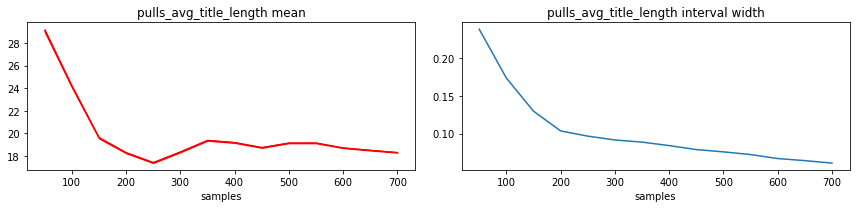

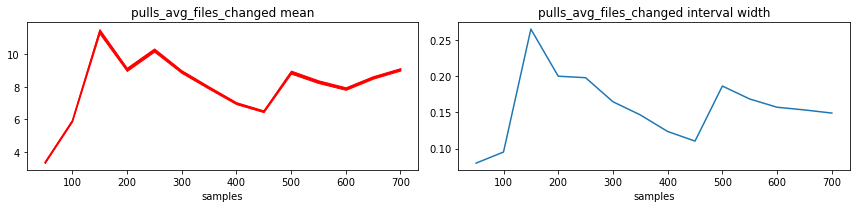

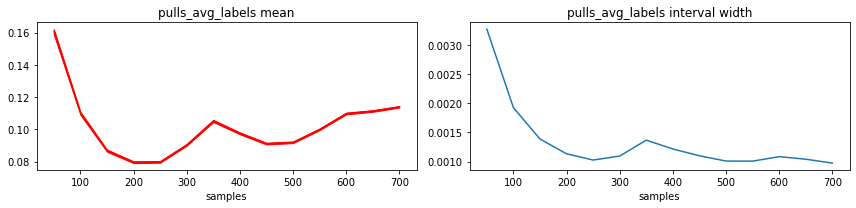

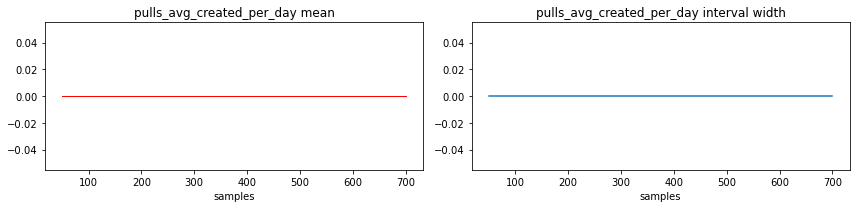

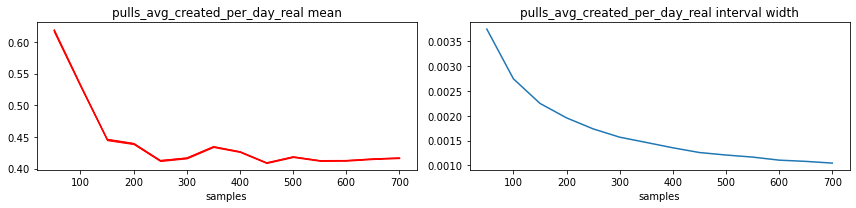

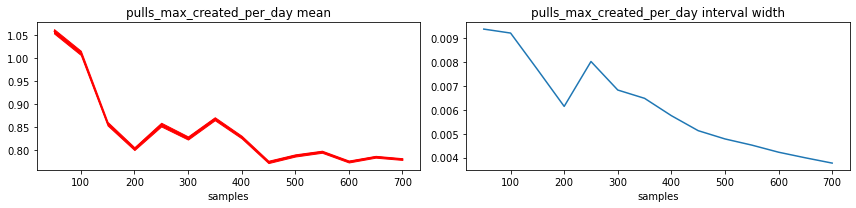

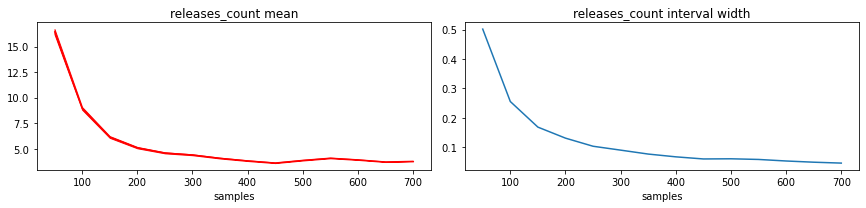

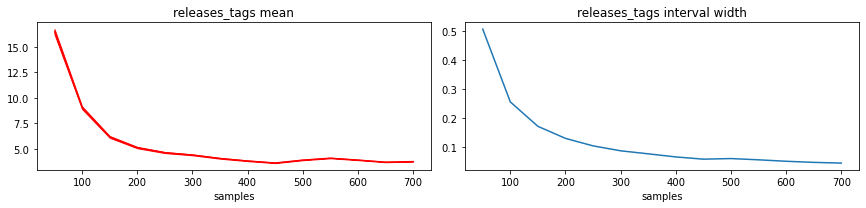

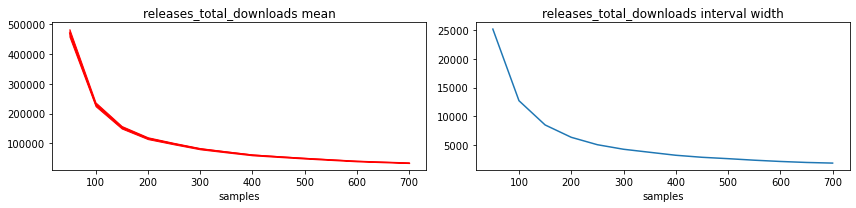

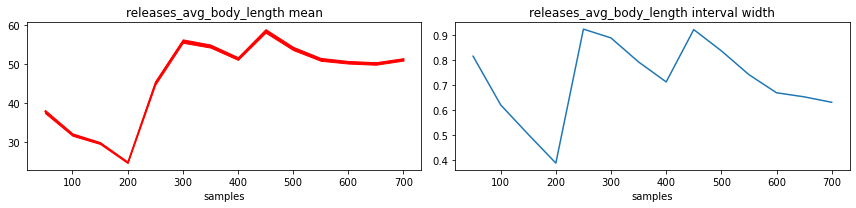

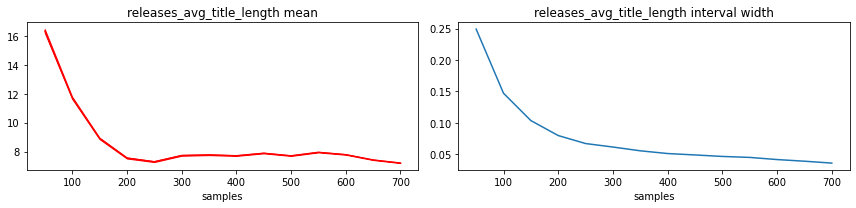

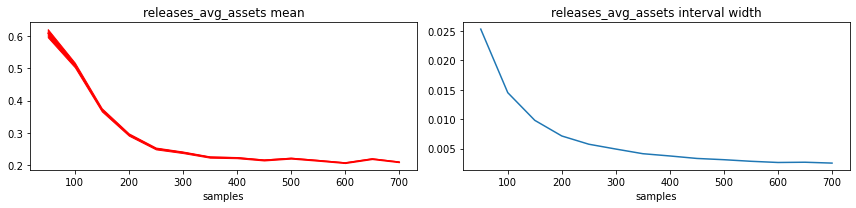

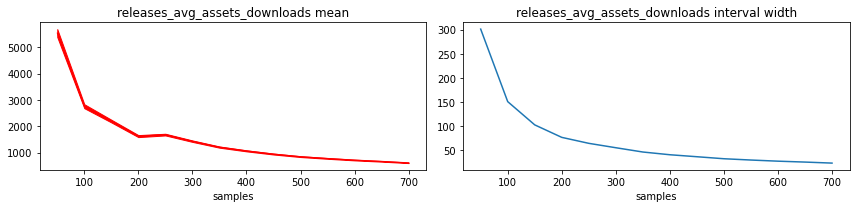

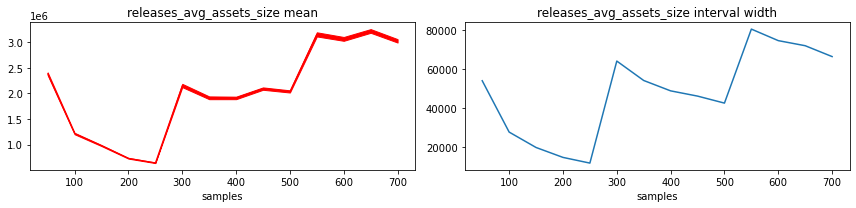

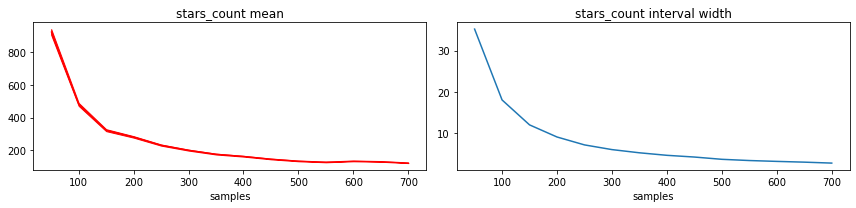

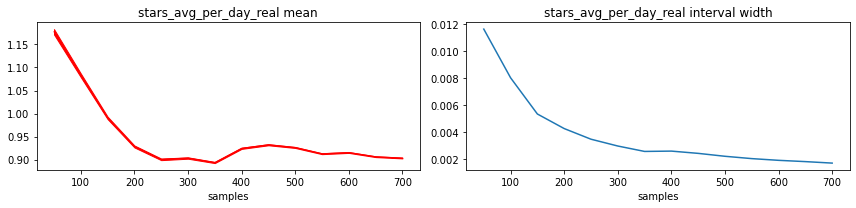

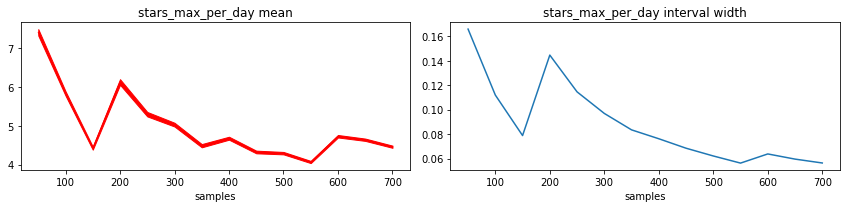

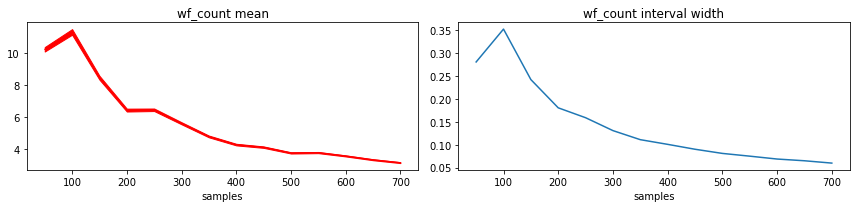

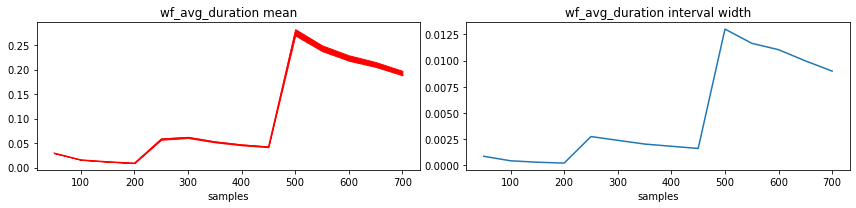

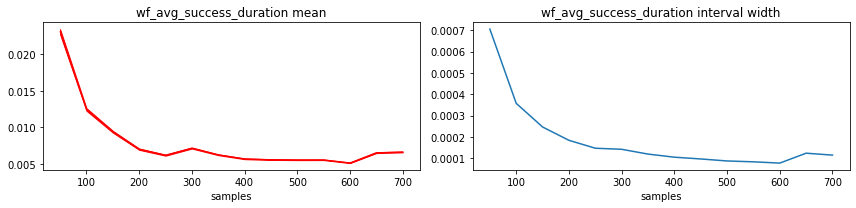

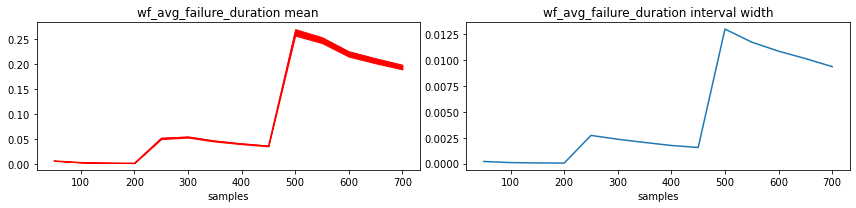

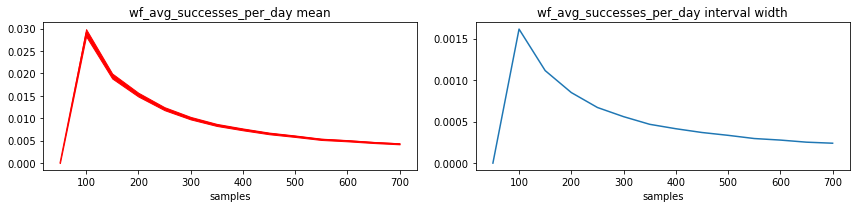

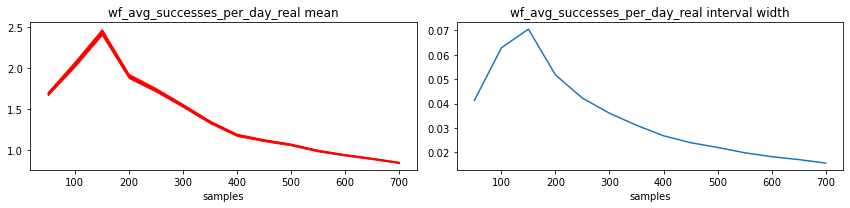

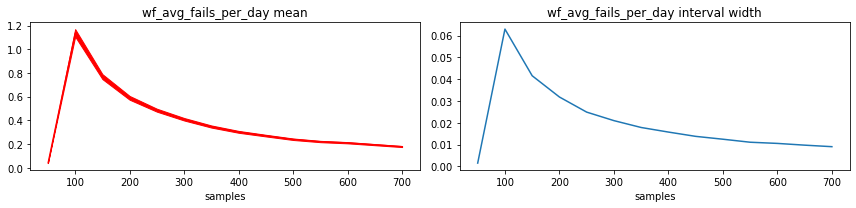

In [15]:
for key in df.keys():
    y = list(map(list, zip(*intervals[key])))
    f, ax = plt.subplots(1, 2, figsize=(12,3))
    ax[0].plot(np.arange(50, len(df), 50), y[2], color="red", lw=1)
    ax[0].set_title(key + " mean")
    ax[0].fill_between(np.arange(50, len(df), 50), y[0], y[1], color="red")  
    ax[0].set_xlabel("samples")
    ax[1].plot(np.arange(50, len(df), 50), np.array(y[1]) - np.array(y[0]))
    ax[1].set_title(key + " interval width")
    ax[1].set_xlabel("samples")
    f.tight_layout()

Dropping zero-filled columns.

In [17]:
df = df.drop(["issues_avg_closing_time", "issues_avg_comment_time", "pulls_avg_closing_time", "pulls_avg_created_per_day"], axis=1)

Applying Kolmogorov-Smirnov test for normality.

In [37]:
ktest_res = {key : stats.kstest(stats.zscore(df[key]), "norm") for key in df.keys()}

df_kstest = pd.DataFrame(ktest_res, columns=df.keys())

In [41]:
df_kstest.to_csv("kstest.csv")

In [39]:
for key in df_kstest.keys():
    if df_kstest[key][1] >= 0.05:
        print(key)

repo_age_days


Text(0.5, 0, 'Number of days')

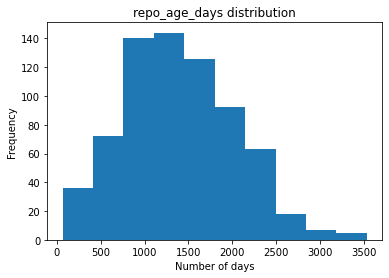

In [43]:
plt.hist(df["repo_age_days"])
plt.title("repo_age_days distribution")
plt.ylabel("Frequency")
plt.xlabel("Number of days")

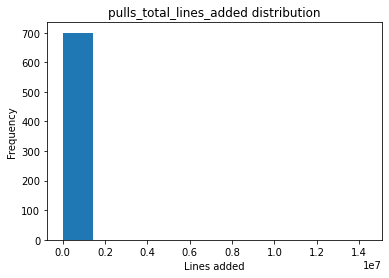

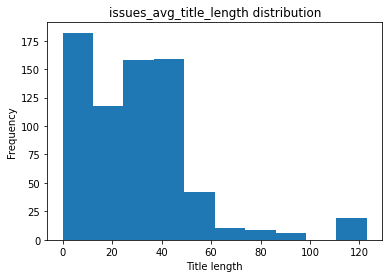

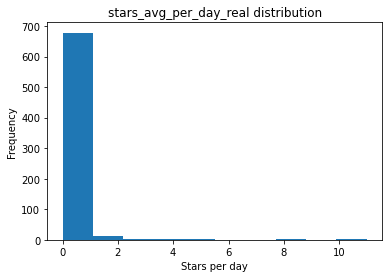

In [54]:
example_list = ["pulls_total_lines_added", "issues_avg_title_length", "stars_avg_per_day_real"]
example_metric = ["Lines added", "Title length", "Stars per day"]

for example, metric in zip(example_list, example_metric):
    plt.subplots(1, 1)
    plt.hist(df[example])
    plt.title(f"{example} distribution")
    plt.ylabel("Frequency")
    plt.xlabel(metric)